# Simple Linear Regression using Statsmodel

## Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
df= pd.read_csv('petrol_consumption.csv')

In [3]:
df.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


# Splitting the dataset into the Training set and Test set

In [5]:
X = df[['Petrol_tax','Average_income','Population_Driver_licence(%)']]#'Petrol_tax','Paved_Highways'
y = df['Petrol_Consumption']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=456)

In [7]:
X_train.head(10)

,Petrol_tax,Average_income,Population_Driver_licence(%)
44,6.00,5215,0.672
35,6.58,3802,0.629
33,7.50,3357,0.547
38,8.50,3635,0.663
36,5.00,4045,0.566
0,9.00,3571,0.525
23,9.00,4258,0.517
3,7.50,4870,0.529
18,7.00,4716,0.724
12,7.00,4817,0.574


# Fitting the Model into the Training set 

### And <strong> Adding an intercept as this is a statsmodel. Adding intercept manually.

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
import statsmodels.api as sm

In [11]:
X_endog = sm.add_constant(X_train)
X_endog1 = sm.add_constant(X_test)

In [12]:
res = sm.OLS(y_train, X_endog)
res.fit()

## Evaluation Done on Training Set

In [13]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     24.96
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.02e-08
Time:                        18:06:26   Log-Likelihood:                -212.80
No. Observations:                  38   AIC:                             433.6
Df Residuals:                      34   BIC:                             440.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          206.2798    186.071      1.109      0.275    -171.862     584.422
Petrol_tax                     -26.2233     12.537     -2.092      0.044     -51.701      -0.746
Average_income                  -0.0684      0.021     -3.232      0.003      -0.111      -0.025
Population_Driver_licence(%)  1514.5815    213.633      7.090      0.000    1080.428    1948.735
==============================================================================
Omnibus:                       11.665   Durbin-Watson:                   2.431
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.112
Skew:                           1.021   Prob(JB):                      0.00234
Kurtosis:                       4.866   Cond. No.                     1.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

y_pred = regressor.predict(X_endog)
y_pred

# Fitting the Model into the Training set 

### And NOT Adding an intercept as this is a statsmodel. 

In [16]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, y, test_size = 0.2,random_state=456)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train1, Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
import statsmodels.api as sm

In [35]:
res = sm.OLS(Y_train1,X_train1)
res.fit()

## Evaluation Done on Training Set

In [36]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              924.0
Date:                Thu, 18 Mar 2021   Prob (F-statistic):                    2.28e-33
Time:                        18:18:07   Log-Likelihood:                         -213.47
No. Observations:                  38   AIC:                                      432.9
Df Residuals:                      35   BIC:                                      437.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petrol_tax                     -16.6652      9.131     -1.825      0.077     -35.202       1.872
Average_income                  -0.0604      0.020     -3.026      0.005      -0.101      -0.020
Population_Driver_licence(%)  1687.9507    146.018     11.560      0.000    1391.518    1984.384
==============================================================================
Omnibus:                        7.503   Durbin-Watson:                   2.440
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.234
Skew:                           0.800   Prob(JB):                       0.0443
Kurtosis:                       4.174   Cond. No.                     5.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting Testing Data

In [37]:
y_pred = regressor.predict(X_test1)
y_pred

array([578.76362493, 662.43486271, 483.47636638, 470.67689453,
       558.32074853, 556.74806197, 625.38263504, 711.86101794,
       409.3025368 , 505.08826814])

## Visualizing the result

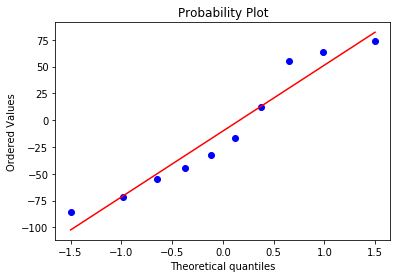

In [38]:
from scipy import stats
stats.probplot(Y_test1-y_pred, plot=plt)
plt.show()

## Model Evaluation for Training set

In [39]:
y_pred_train = regressor.predict(X_train1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train1, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(Y_train1, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train1, y_pred_train)))

Mean Absolute Error: 49.38412035712645
Mean Squared Error: 4281.66277077009
Root Mean Squared Error: 65.43441579757621


In [40]:
def mean_absolute_percentage_error(y_true, y_pred_train): 
    return np.mean(np.abs((y_true - y_pred_train) / y_true)) * 100

In [41]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_train1, y_pred_train))

Mean Absolute percentage error: 8.244782959878714


## Model Evaluation for Test set

In [42]:
y_pred1 = regressor.predict(X_test1)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test1, y_pred1)))

Mean Absolute Error: 51.06893871665558
Mean Squared Error: 3142.09424248771
Root Mean Squared Error: 56.05438646963955


In [46]:
def mean_absolute_percentage_error(y_true, y_pred1): 
    return np.mean(np.abs((y_true - y_pred1) / y_true)) * 100

In [47]:
print('Mean Absolute percentage error:', mean_absolute_percentage_error(Y_test1, y_pred1))


Mean Absolute percentage error: 9.246450233883316
